In [2]:
import numpy as np
import pandas as pd

In [3]:
listing = pd.read_csv("data\listings.csv")

In [4]:
# 查看数据集基本情况
listing.head()

id                           listing_url       scrape_id last_scraped  \
0  2797791  https://www.airbnb.com/rooms/2797791  20220621060517   2022-06-21   
1  4990531  https://www.airbnb.com/rooms/4990531  20220621060517   2022-06-21   
2  6207089  https://www.airbnb.com/rooms/6207089  20220621060517   2022-06-21   
3  6223892  https://www.airbnb.com/rooms/6223892  20220621060517   2022-06-21   
4  6232044  https://www.airbnb.com/rooms/6232044  20220621060517   2022-06-21   

                                                name  \
0                          Beijing Great Wall Escape   
1  Monthly Discounted- Orchid's Residence Expansi...   
2                               雍和宫地铁附近崇文门东单南二环精装双床房   
3                  北京家诚-方庄蒲黄榆南站地铁情侣观景房，舒适大床，可做饭，新中式风   
4                                同仁协和医院东单五号线地铁旁家庭双床房   

                                         description  \
0  A perfect escape only 2 hours away from Beijin...   
1  Begin the day in the tiled rain shower and wit...   
2  位于北京市丰台区方庄物美大卖场旁（地铁5号线蒲黄榆站楼上）。交通非常便利：距离南二环玉蜓桥南...   
3  房间位于地铁五号线蒲黄榆站楼上，楼下是方庄物美大卖场，房间设施免费使用，35寸超大液晶电视，...   
4  位于北京市丰台区方庄物美大卖场旁（地铁5号线蒲黄榆站楼上）。交通非常便利：距离南二环玉蜓桥南...   

                               neighborhood_overview  \
0  Located in a small village at the base of the ...   
1  The neighborhood is very safe and full of loca...   
2  公寓北部是龙潭湖公园，西北是天坛公园、北京游乐场、北京教学植物园、北京国际网球中心、南面是中...   
3          美食：海底捞火锅方庄店、全聚德烤鸭店，方庄时代广场<br />娱乐：博纳国际电影院   
4  北部是龙潭湖公园，西北是天坛公园、北京游乐场、北京教学植物园、北京国际网球中心、南面是中央音...   

                                         picture_url   host_id  \
0  https://a0.muscache.com/pictures/da7d00b7-37f0...  14311129   
1  https://a0.muscache.com/pictures/ebd3ed91-02e2...  25729513   
2  https://a0.muscache.com/pictures/83597610/e003...  32187257   
3  https://a0.muscache.com/pictures/miso/Hosting-...  32187257   
4  https://a0.muscache.com/pictures/miso/Hosting-...  32187257   

                                     host_url  ...  \
0  https://www.airbnb.com/users/show/14311129  ...   
1  https://www.airbnb.com/users/show/25729513  ...   
2  https://www.airbnb.com/users/show/32187257  ...   
3  https://www.airbnb.com/users/show/32187257  ...   
4  https://www.airbnb.com/users/show/32187257  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.92                   4.91                4.30   
1                        4.88                   4.88                4.76   
2                        5.00                   5.00                5.00   
3                        5.00                   5.00                5.00   
4                        5.00                   5.00                5.00   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              1   
1     NaN                f                             10   
2     NaN                t                              9   
3     NaN                t                              9   
4     NaN                t                              9   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           6   
2                                           9   
3                                           9   
4                                           9   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            4   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.57  
1                                           0              0.22  
2                                           0              0.12  
3                                           0              0.23  
4                                     

In [5]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6657 non-null   int64  
 1   listing_url                                   6657 non-null   object 
 2   scrape_id                                     6657 non-null   int64  
 3   last_scraped                                  6657 non-null   object 
 4   name                                          6657 non-null   object 
 5   description                                   6564 non-null   object 
 6   neighborhood_overview                         5835 non-null   object 
 7   picture_url                                   6657 non-null   object 
 8   host_id                                       6657 non-null   int64  
 9   host_url                                      6657 non-null   o

In [6]:
# 预处理price，将object数据转化为int格式
def convert_currency(var):
    """
    convert the string number to a float
    _ 去除$
    - 去除逗号，
    - 转化为浮点数类型
    """
    new_value = var.replace(",","").replace("$","")
    return float(new_value)

listing["price"] = listing["price"].apply(convert_currency)

In [7]:
# 连续性数据
new_columns = ['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
data = listing[new_columns]
data.describe()

price  minimum_nights  number_of_reviews  \
count   6657.000000     6657.000000        6657.000000   
mean    1687.660358        1.180562           5.289620   
std     2080.966851        4.053299          15.005025   
min        0.000000        1.000000           0.000000   
25%      374.000000        1.000000           0.000000   
50%      848.000000        1.000000           1.000000   
75%     2400.000000        1.000000           4.000000   
max    25091.000000      300.000000         490.000000   

       calculated_host_listings_count  availability_365  
count                     6657.000000       6657.000000  
mean                         9.447349         28.368034  
std                         14.538637         13.946877  
min                          1.000000          0.000000  
25%                          2.000000         20.000000  
50%                          6.000000         37.000000  
75%                         10.000000         38.000000  
max                        100.000000         38.000000

<BarContainer object of 3 artists>

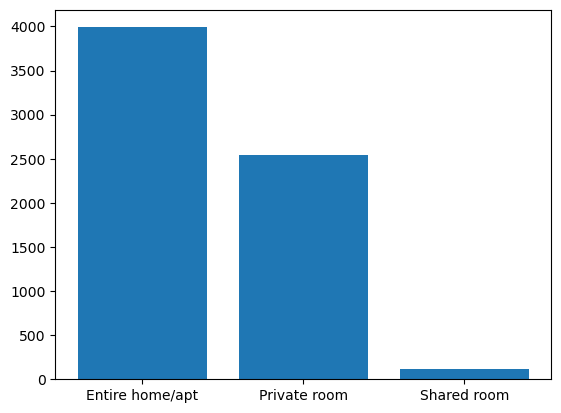

In [8]:
import matplotlib.pyplot as plt

# 民宿分布分析
data = listing['room_type'].value_counts().tolist()
a = listing['room_type'].unique()
plt.bar(x=a, height=data)

In [9]:
listing[['host_name','name']].groupby('host_name').count().sort_values(by='name',ascending=False).head()

name
host_name               
李                    108
Wohkoon者行孙青年旅舍什刹海店    57
广安门                   51
辉                     45
静                     40

In [10]:
listing['neighbourhood_cleansed'].value_counts()

怀柔区 / Huairou       1445
延庆县 / Yanqing       1136
密云县 / Miyun          767
朝阳区 / Chaoyang       568
通州区 / Tongzhou       510
东城区                  495
房山区                  416
平谷区 / Pinggu         241
西城区                  204
昌平区                  178
大兴区 / Daxing         168
丰台区 / Fengtai        155
门头沟区 / Mentougou     132
海淀区                   93
石景山区                  88
顺义区 / Shunyi          61
Name: neighbourhood_cleansed, dtype: int64

In [11]:
# 定义了一个查看哪些区域超过了平均民宿数量来用作饼图的参数分配
def explode_situtation(data):
    explode = {}
    for i in range(len(data)):
        if data[i]>data.mean():
            explode[data.index[i]] = 0.1
        else:
            explode[data.index[i]] = 0
    return explode


explode = list(explode_situtation(listing.neighbourhood_cleansed.value_counts()).values())

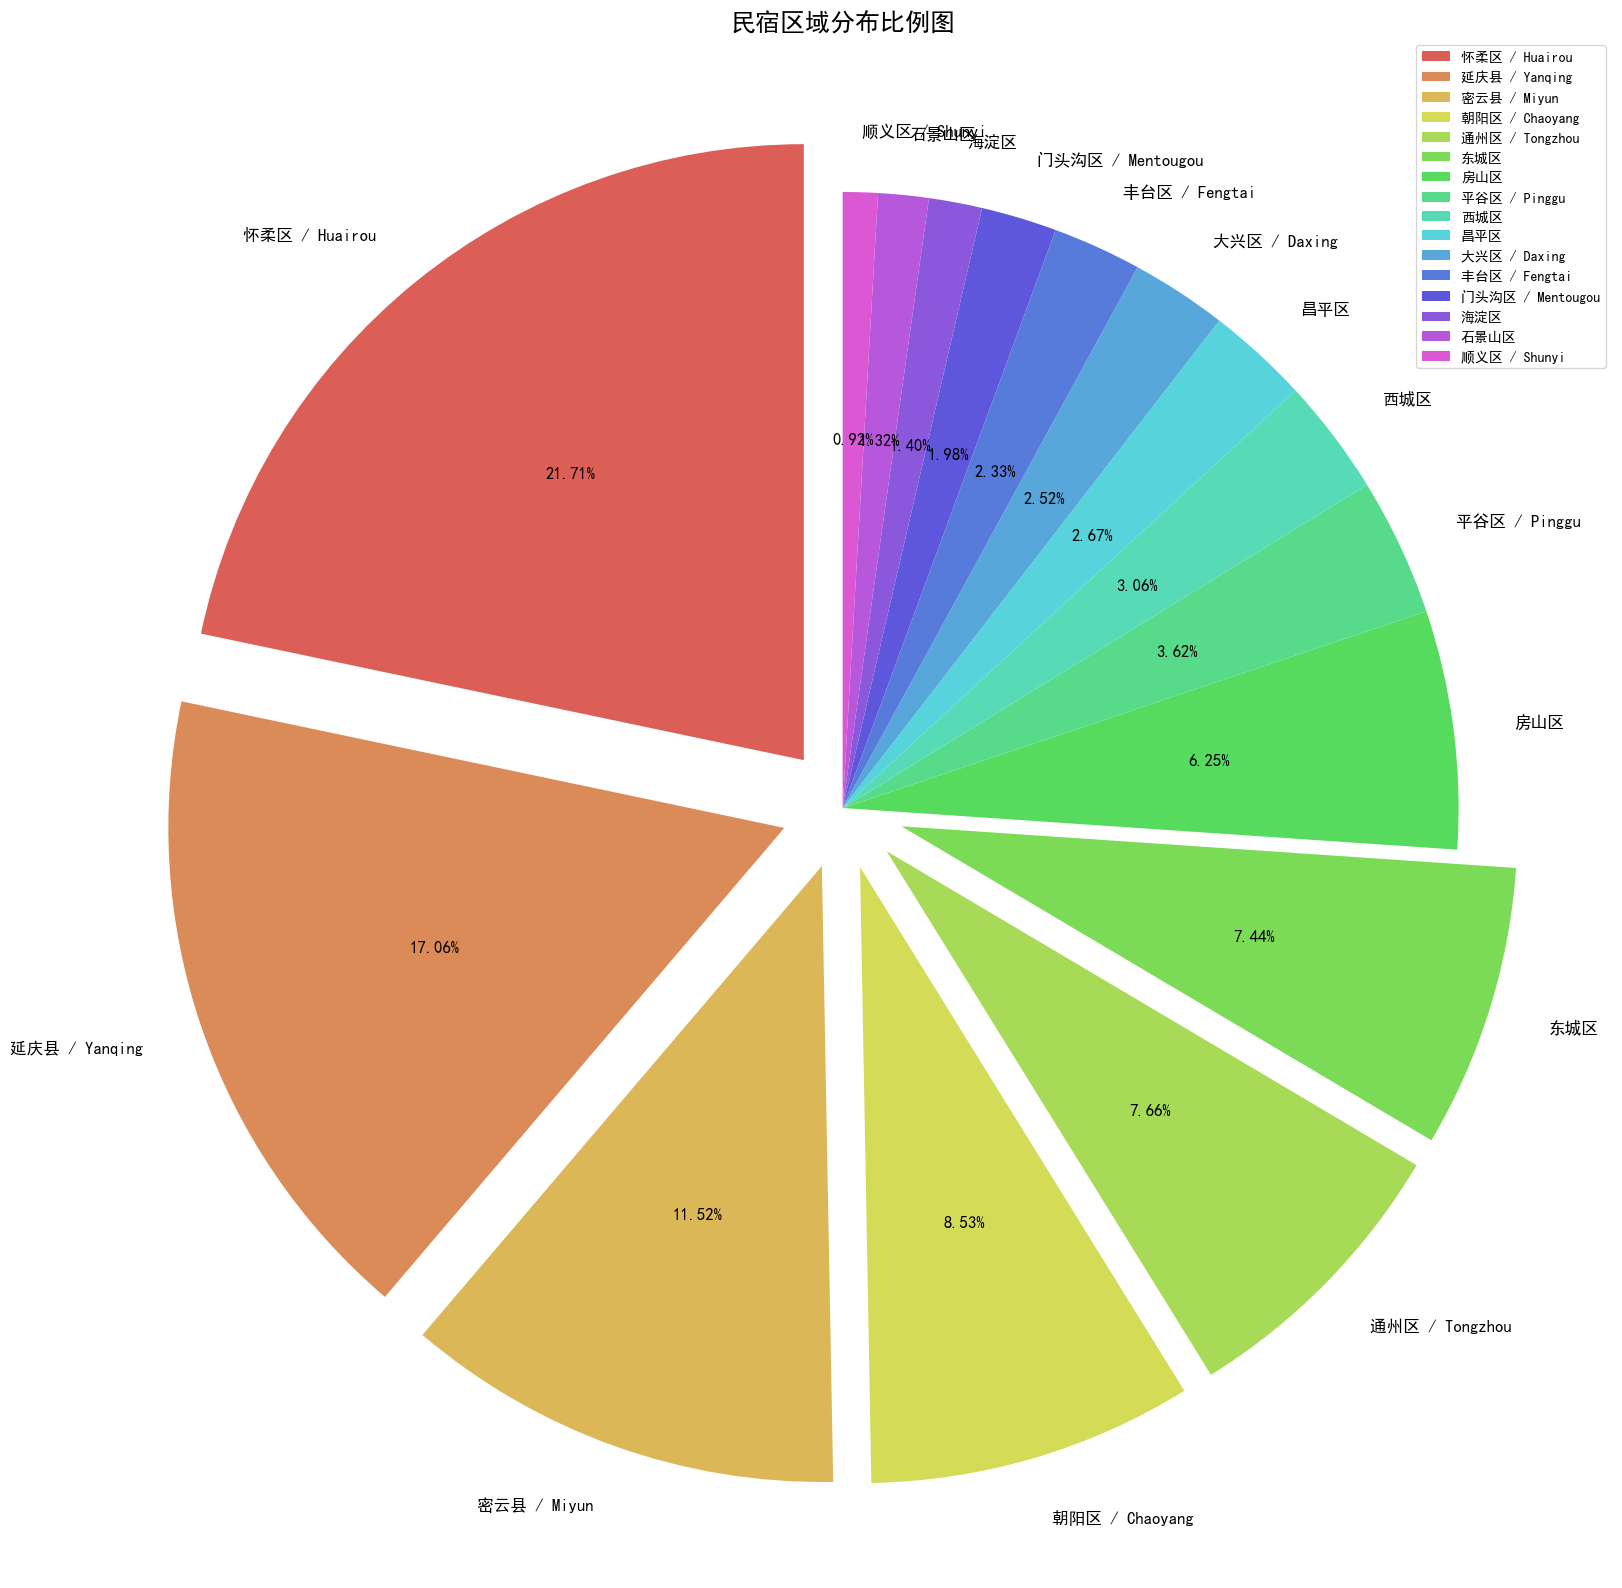

In [12]:
import seaborn as sns

# 解决中文乱码
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["font.family"]="sans-serif"

data2 = listing.neighbourhood_cleansed.value_counts()
plt.figure(figsize=(20,20))
plt.title('民宿区域分布比例图',fontdict={'fontsize':18})
plt.pie(data2,labels=data2.index,autopct='%.2f%%',explode=explode,startangle=90,
       textprops={'fontsize':12,'color':'black'},colors=sns.color_palette('hls',n_colors=18))
plt.legend()

C:\Users\ltingsong\AppData\Local\Temp\ipykernel_2088\1912807224.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listing['price'],color='b')


<AxesSubplot: xlabel='price', ylabel='Density'>

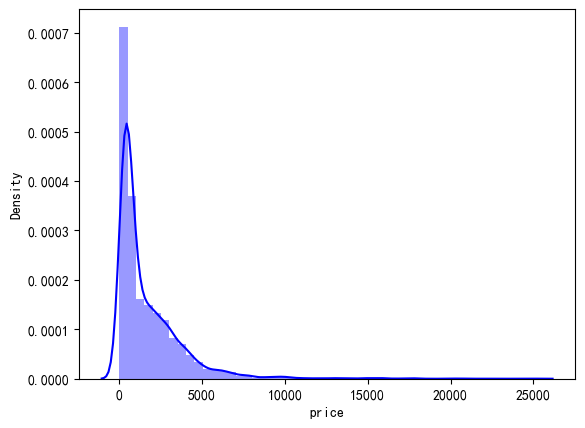

In [13]:
# 查看价格情况
sns.distplot(listing['price'],color='b')

In [14]:
price_is_0 = listing[listing['price']==0]
price_is_0

id                            listing_url       scrape_id  \
6332  43369350  https://www.airbnb.com/rooms/43369350  20220621060517   

     last_scraped                     name  \
6332   2022-06-21  野三坡百里峡村北山舍民宿，自助烧烤，露天游泳池   

                                            description  \
6332  村北山舍民宿第二个院子"右舍"是以田园风光的格调设计完成，整体面积大约300平米。本小院拥有...   

                        neighborhood_overview  \
6332  首都环线G95高速野三坡都衙出口，右转三分钟即到。高德地图直接导航村北山舍民宿   

                                            picture_url    host_id  \
6332  https://a0.muscache.com/pictures/a6a25260-6da6...  277558727   

                                         host_url  ...  \
6332  https://www.airbnb.com/users/show/277558727  ...   

     review_scores_communication review_scores_location review_scores_value  \
6332                         3.0                    3.0                 3.0   

     license instant_bookable calculated_host_listings_count  \
6332     NaN                f                              3   

     calculated_host_listings_count_entire_homes  \
6332                                           3   

     calculated_host_listings_count_private_rooms  \
6332                                            0   

     calculated_host_listings_count_shared_rooms reviews_per_month  
6332                                           0              0.09  

[1 rows x 74 columns]

In [20]:
# 清除异常数据
drop_index_list = price_is_0.index.tolist()
listing_dealt = listing.drop(drop_index_list)
listing_dealt[listing_dealt['price']==0]
listing_dealt['neighbourhood_cleansed']

0       怀柔区 / Huairou
1                 东城区
2       丰台区 / Fengtai
3       丰台区 / Fengtai
4       丰台区 / Fengtai
            ...      
6652              房山区
6653              房山区
6654              房山区
6655              房山区
6656      密云县 / Miyun
Name: neighbourhood_cleansed, Length: 6656, dtype: object

In [22]:
# 对各个区的价格进行可视化描述

b=pd.DataFrame(listing_dealt['neighbourhood_cleansed'].unique(),columns=['区域'])
b['最高价格']=listing_dealt[['price','neighbourhood_cleansed']].groupby('neighbourhood_cleansed').max().price.tolist()
b['最低价格']=listing_dealt[['price','neighbourhood_cleansed']].groupby('neighbourhood_cleansed').min().price.tolist()
b['中位数价格']=listing_dealt[['price','neighbourhood_cleansed']].groupby('neighbourhood_cleansed').median().price.tolist()
b['25%价格']=listing_dealt[['price','neighbourhood_cleansed']].groupby('neighbourhood_cleansed').quantile(0.25).price.tolist()
b['75%价格']=listing_dealt[['price','neighbourhood_cleansed']].groupby('neighbourhood_cleansed').quantile(0.75).price.tolist()
b['25%价格']=np.array(listing_dealt[['price','neighbourhood_cleansed']].groupby('neighbourhood_cleansed').quantile(0.75).price.tolist())-np.array(listing_dealt[['price','neighbourhood_cleansed']].groupby('neighbourhood_cleansed').quantile(0.25).price.tolist())
b

区域     最高价格   最低价格   中位数价格    25%价格    75%价格
0      怀柔区 / Huairou  20686.0   42.0   342.0   432.00   654.00
1                东城区   3366.0   70.0   338.0    88.00   398.00
2      丰台区 / Fengtai   4998.0   25.0   254.0   361.00   559.00
3     朝阳区 / Chaoyang  10541.0   61.0   994.0  1709.50  2109.50
4        密云县 / Miyun  25091.0  151.0  2568.0  2359.00  3639.00
5                房山区  24214.0  131.0  1866.0  2393.75  3200.00
6                西城区  18056.0  118.0  1981.0  2709.00  3418.00
7       大兴区 / Daxing  15000.0   67.0   999.0  2287.50  2575.50
8      延庆县 / Yanqing  22000.0   76.0  2097.5  2424.75  3223.00
9       顺义区 / Shunyi   9999.0   34.0   458.0   227.25   571.25
10    通州区 / Tongzhou   5434.0  120.0   458.0   189.00   557.00
11               昌平区  10120.0  239.0   389.5   120.00   493.00
12  门头沟区 / Mentougou  12800.0  112.0   527.0   168.00   639.00
13      平谷区 / Pinggu   9598.0   19.0   359.5   523.75   747.75
14               海淀区  20000.0  150.0  1550.5  2359.00  3000.00
15              石景山区  12800.0  168.0  2028.0  2331.00  3000.00

In [23]:
# 获取90分位数值

avg_review = listing_dealt['number_of_reviews'].quantile(0.9)
avg_month_review = listing_dealt['reviews_per_month'].quantile(0.9)
print(avg_review)
print(avg_month_review)

13.0
1.12


In [26]:
# 根据90分位数值找到受欢迎的民宿

popular_home = listing_dealt[(listing_dealt['number_of_reviews']>avg_review)&(listing_dealt['reviews_per_month']>avg_month_review)]
head10=popular_home.sort_values(by=['number_of_reviews','reviews_per_month'],ascending=False).head(10)

In [32]:
# head10
# head10['property_type']
head10['price']

824     610.0
2516    319.0
40       75.0
4414    344.0
2513    315.0
1085    606.0
526     310.0
51       76.0
1733    530.0
1798    181.0
Name: price, dtype: float64

In [42]:
import jieba

# 对描述进行分词

def jieba_cut(data):
    a=[]
    worddict={}
    with open('cn_stopwords.txt', encoding='utf8') as f:
        result=f.read().split()
    for i in data:
        words=jieba.lcut(i)
        word=[x for x in words if x not in result]
        a.extend(word)
    for word in a:
        worddict.setdefault(word,0)
        worddict[word]+=1
    return worddict
popular_words = jieba_cut(popular_home.name.astype('str'))

In [41]:
def deal_with_meanless_word(data):
    mean_words={}
    for i in data.keys():
        if len(i)>1:
            mean_words[i]=data[i]
    return mean_words
mean_words=deal_with_meanless_word(popular_words)
mean_words_df=pd.Series(mean_words).sort_values(ascending=False)
mean_words_df_top15=mean_words_df.head(15)
mean_words_df_top15

地铁     88
胡同     52
投影     47
烧烤     40
别墅     37
独立     36
大床     36
环球     33
步行     31
天安门    31
五道     30
分钟     30
国贸     30
四合院    30
影城     27
dtype: int64

<AxesSubplot: title={'center': '最受欢迎的房间中关键词'}>

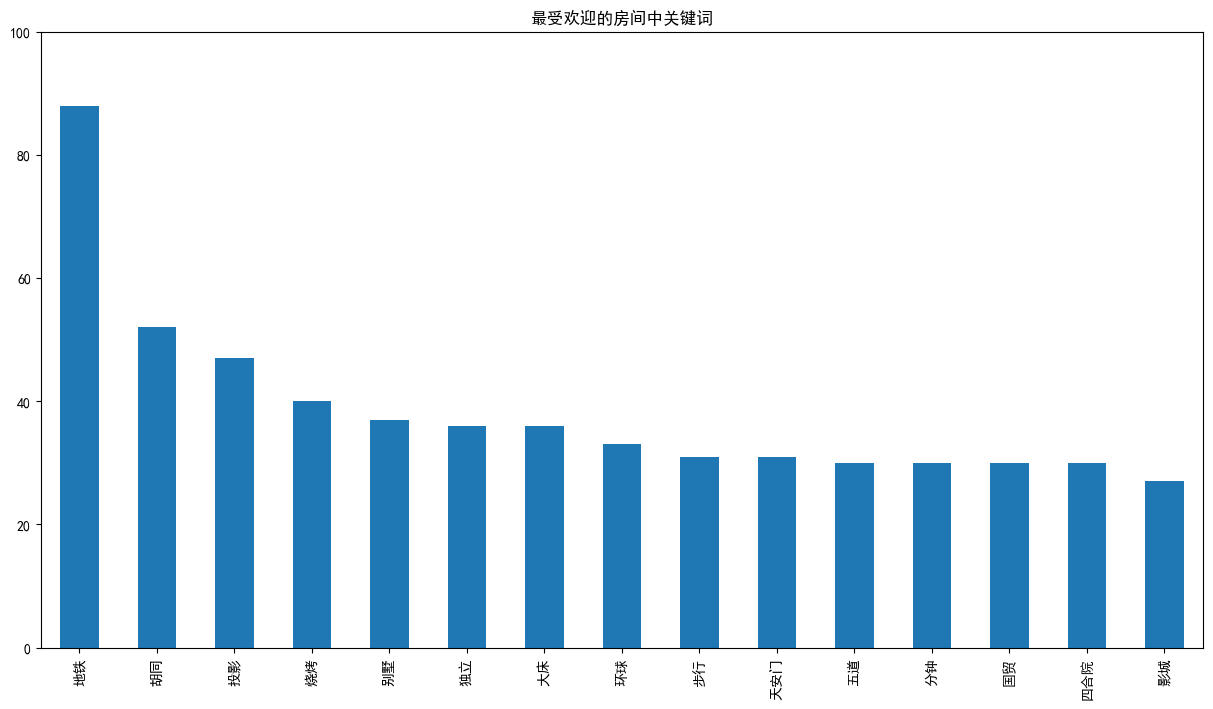

In [44]:
plt.figure(figsize=(15,8))
plt.title('最受欢迎的房间中关键词')
mean_words_df_top15.plot(kind='bar',ylim=[0,100])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\ltingsong\.conda\envs\airbnb\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f', 'axis']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


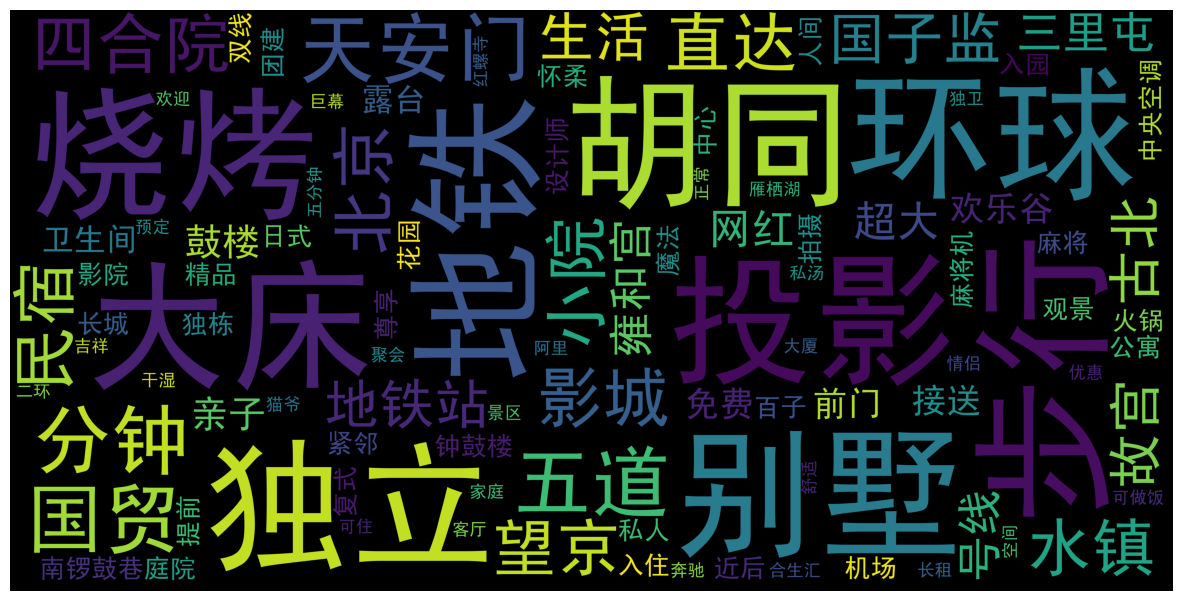

In [56]:
import re
from wordcloud import WordCloud
%pylab inline
%matplotlib inline

wordcloud_use=' '.join(mean_words_df.keys())
resultword=re.sub("[A-Za-z0-9\[\`\~\!\@\#\$\^\&\*\(\)\=\|\{\}\'\:\;\'\,\[\]\.\<\>\/\?\~\。\@\#\\\&\*\%]","",wordcloud_use)
w=WordCloud(scale=26,margin=3,background_color='black',font_path='simhei.ttf',max_words=100,max_font_size=50,random_state=20).generate(resultword)
f,axis=plt.subplots(figsize=(15,15))
plt.axis('off')
plt.imshow(w)